# Homework: Basic Artificial Neural Networks

In [128]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [129]:
# (re-)load layers
%run homework_modules.ipynb

Optimizer is implemented for you. 

In [130]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)

            cur_x -= cur_old_grad
            i += 1     

In [131]:
def normalization(column):
    column_min = column.min()
    column_max = column.max()
  
    column_range = column_max - column_min
    if(column_range == 0):
        return (column - column_min)

    return (column - column_min) / column_range

In [132]:
def create_onehot(column):
    class_count = column.max() + 1
    size = column.shape[0]
    onehot = np.zeros((size, class_count), dtype=float)
    
    for i in range(size):
        onehot[i][column[i]] = 1.0
        
    return onehot

In [133]:
# Open MNIST dataset and prepare for train
from mlxtend.data import loadlocal_mnist

x_train, y_train = loadlocal_mnist(images_path='Dataset/train-images-idx3-ubyte', labels_path='Dataset/train-labels-idx1-ubyte')

x_test, y_test = loadlocal_mnist(images_path='Dataset/t10k-images-idx3-ubyte', labels_path='Dataset/t10k-labels-idx1-ubyte')

# normalize
x_train = normalization(x_train)
x_test = normalization(x_test)

# create onehot for y
y_train_onehot = create_onehot(y_train)
y_test_onehot = create_onehot(y_test)

In [134]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [135]:
features = x_train.shape[1]

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 6
batch_size = 180

### Build NN

In [136]:
net = Sequential()
net.add(Linear(features, 300))
net.add(ReLU())
net.add(Linear(300, 10))
net.add(SoftMax())

criterion = MSECriterion()

print(net)

Linear 784 -> 300
ReLU
Linear 300 -> 10
SoftMax



### Train

Basic training loop. Examine it.

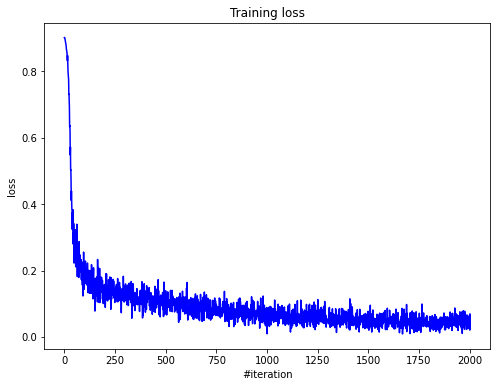

Current loss: 0.058486


In [137]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((x_train, y_train_onehot), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)
    
    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

### Build NN with dropout

In [90]:
net = Sequential()
net.add(Linear(features, 300))
net.add(ReLU())
net.add(Dropout(0.7))
net.add(Linear(300, 10))
net.add(SoftMax())

criterion = MSECriterion()

print(net)

Linear 784 -> 300
ReLU
Dropout
Linear 300 -> 10
SoftMax



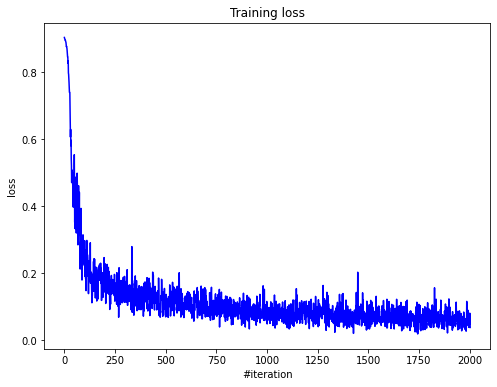

Current loss: 0.037798


In [91]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((x_train, y_train_onehot), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [92]:
# Your answer goes here. ################################################

In [120]:
net = Sequential()
net.add(Linear(features, 600))
net.add(ReLU())
net.add(Dropout(0.7))
net.add(Linear(600, 300))
net.add(ReLU())
net.add(Linear(300, 100))
net.add(ReLU())
net.add(Linear(100, 10))
net.add(SoftMax())

criterion = MSECriterion()

print(net)

Linear 784 -> 600
ReLU
Dropout
Linear 600 -> 300
ReLU
Linear 300 -> 100
ReLU
Linear 100 -> 10
SoftMax



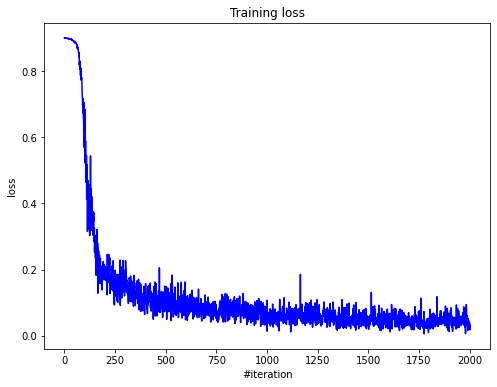

Current loss: 0.029772


In [121]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((x_train, y_train_onehot), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [ ]:
# Your code goes here. ################################################

In [ ]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################